# 실루엣 분석 (Silhouette Analysis)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 아이리스 데이터 클러스터링 평가

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=['sl', 'sw', 'pl', 'pw'])

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=2021)
kmeans.fit(iris.data)

KMeans(n_clusters=3, random_state=2021)

In [4]:
iris_df['cluster'] = kmeans.labels_
iris_df.head()

,sl,sw,pl,pw,cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
# 실루엣 계수
from sklearn.metrics import silhouette_samples, silhouette_score

score_samples = silhouette_samples(iris.data, iris_df.cluster)
iris_df['실루엣 계수'] = score_samples
iris_df.tail()

,sl,sw,pl,pw,cluster,실루엣 계수
145,6.7,3.0,5.2,2.3,2,0.425136
146,6.3,2.5,5.0,1.9,1,0.104171
147,6.5,3.0,5.2,2.0,2,0.314930
148,6.2,3.4,5.4,2.3,2,0.352454
149,5.9,3.0,5.1,1.8,1,0.185442


In [6]:
# 개별 실루엣 계수의 평균이 실루엣 스코어
silhouette_score(iris.data, iris_df.cluster)

0.5528190123564091

In [7]:
iris_df.groupby('cluster')['실루엣 계수'].mean()

cluster
0    0.798140
1    0.417320
2    0.451105
Name: 실루엣 계수, dtype: float64

### 클러스터별 평균 실루엣 계수의 시각화

In [8]:
from visualize import visualize_silhouette

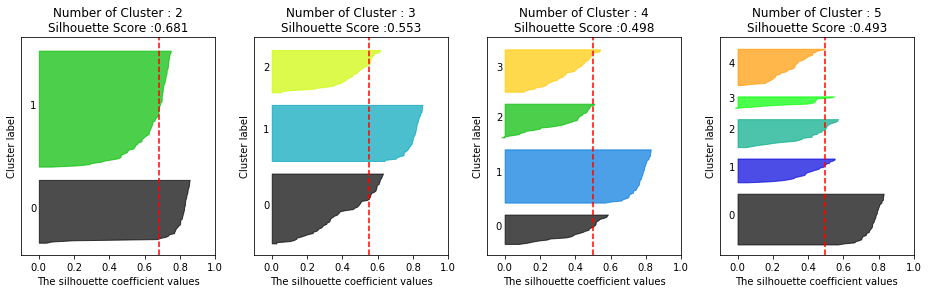

In [9]:
visualize_silhouette([2, 3, 4, 5], iris.data)